This image is:  <class 'numpy.ndarray'> with dimensions:  (480, 854, 3)


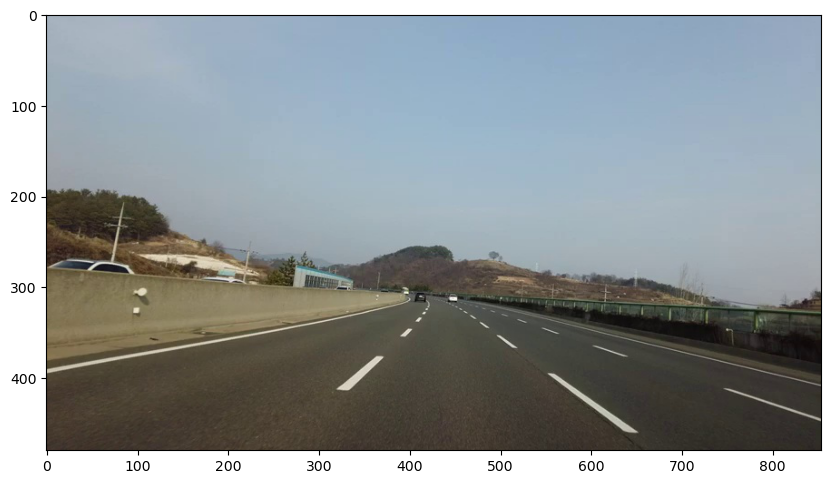

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

img = mpimg.imread('asdlf.jpg')

plt.figure(figsize=(10,8))
print('This image is: ', type(img), 'with dimensions: ', img.shape)
plt.imshow(img)
plt.show()
#이미지 읽어오기

#### 이미지를 읽어오는 코드입니다.
#### mpimg.imread() 함수를 사용하여 'asdlf.jpg' 파일을 읽어와 변수 img에 저장하였습니다.
#### 그리고 imshow() 함수를 사용하여 이미지를 화면에 보여주고 있습니다.
#### plt.show() 함수를 사용하여 화면에 출력된 이미지를 보여주고 있습니다.
#### 코드 실행 결과, 이미지 파일이 성공적으로 읽혔고, 해당 이미지가 어떤 타입인지와 크기는 img.shape로 출력하였습니다.

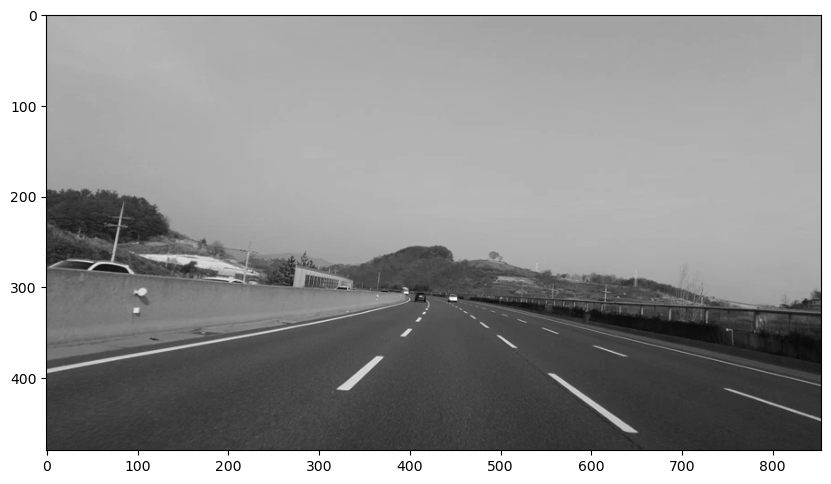

In [2]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = grayscale(img)
plt.figure(figsize=(10,8))
plt.imshow(gray, cmap = 'gray')
plt.show()
#gray색으로 변경

#### 주어진 이미지를 그레이스케일로 변경하는 코드가 작성하였습니다.
#### cv2.cvtColor() 함수를 사용하여 RGB 이미지를 그레이스케일 이미지로 변환하고, 결과 이미지를 gray 변수에 저장했습니다.
#### 그리고 imshow() 함수를 사용하여 그레이스케일 이미지를 화면에 출력했습니다.
#### cmap 매개변수를 'gray'로 설정하여 회색조 이미지로 출력하고 있습니다.
#### plt.show() 함수를 사용하여 화면에 출력된 이미지를 보여주고 있습니다.
#### 코드 실행 결과, 주어진 이미지가 그레이스케일로 변환되어 화면에 출력했습니다.

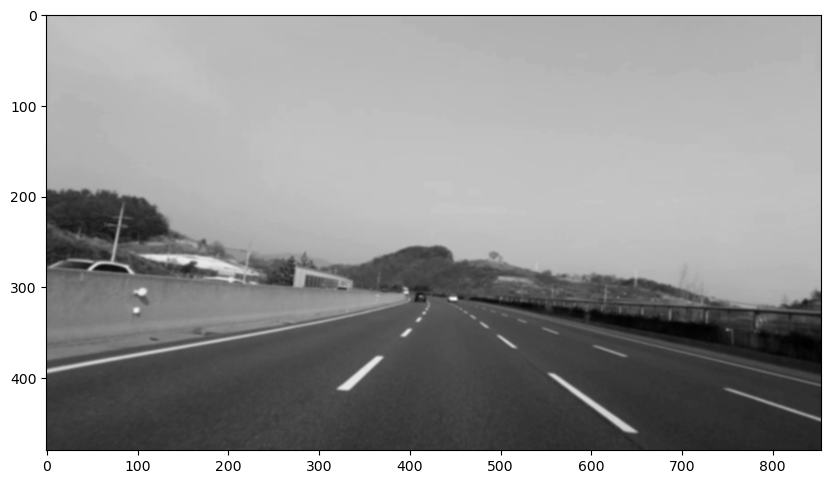

In [3]:
def gaussian_blur(img, kernel_size):
    blur_gray = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return blur_gray

kernel_size = 5
blur_gray = gaussian_blur(gray, kernel_size)

plt.figure(figsize = (10,8))
plt.imshow(blur_gray, cmap = 'gray')
plt.show()
#가우시안 블러

#### 가우시안 블러(Gaussian Blur)를 적용하는 코드를 만들었습니다.
#### cv2.GaussianBlur() 함수를 사용하여 kernel_size 크기의 가우시안 필터를 적용한 이미지를 blur_gray 변수에 저장했습니다.
#### 그리고 imshow() 함수를 사용하여 가우시안 블러를 적용한 이미지를 화면을 출력했습니다.
#### plt.show() 함수를 사용하여 화면에 출력된 이미지를 보여줬습니다.
#### 코드 실행 결과, 주어진 이미지에 가우시안 블러가 적용되어 화면에 출력하였습니다.

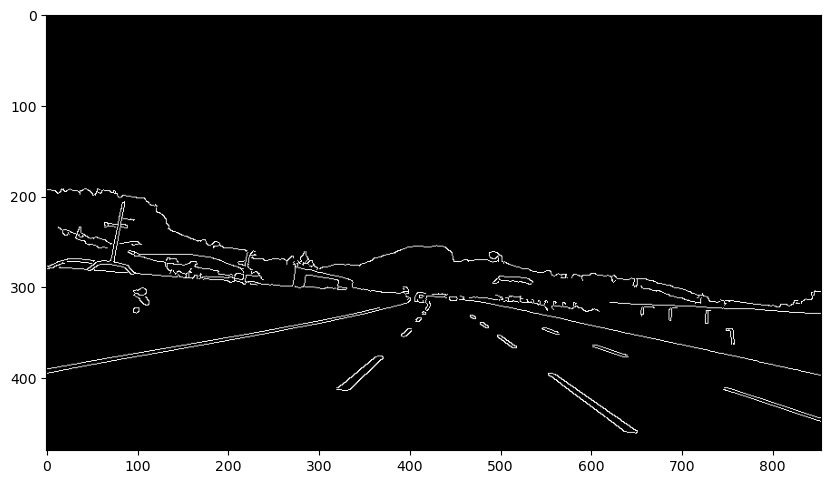

In [4]:
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

low_threshold =50
high_threshold = 200
edges = canny(blur_gray, low_threshold, high_threshold)

plt.figure(figsize=(10,8))
plt.imshow(edges, cmap ='gray')
plt.show()
#canny edge detection

#### 이미지에 캐니(Canny) 에지 검출을 적용하는 코드로 작성하였습니다.
#### cv2.Canny() 함수를 사용하여 low_threshold와 high_threshold 값을 적용한 캐니 에지 검출을 적용한 이미지를 edges 변수에 저장하고, imshow() 함수를 사용하여 캐니 에지 검출을 적용한 이미지를 화면에 출력했습니다.
#### plt.show() 함수를 사용하여 화면에 출력된 이미지를 출력했습니다.
#### 코드 실행 결과, 주어진 이미지에 캐니 에지 검출이 적용되어 화면에 출력되었습니다.

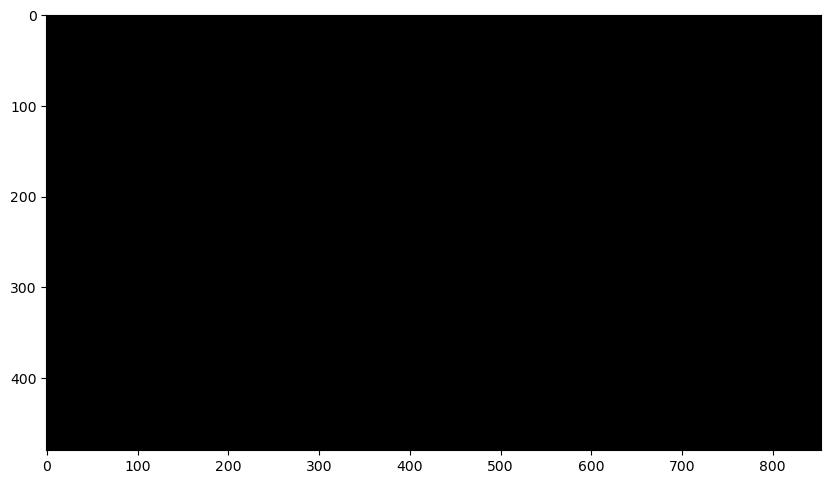

In [5]:
import numpy as np

mask = np.zeros_like(img)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap = 'gray')
plt.show()
#화면 검정으로 채움.

#### 이미지와 같은 크기의 검정색 이미지를 생성하는 코드입니다.
#### numpy.zeros_like() 함수를 사용하여 img와 같은 크기의 모든 요소가 0인 배열을 생성하고, mask 변수에 저장했습니다.
#### 그리고 imshow() 함수를 사용하여 검정색 이미지인지를 확인했습니다.

(480, 854, 3)


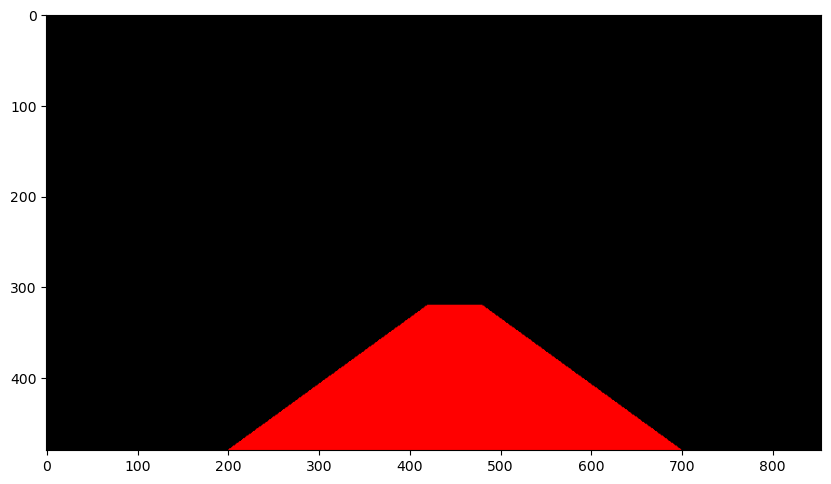

In [6]:
if len(img.shape) > 2:
    channel_count = img.shape[2]
    ignore_mask_color = (255,)
else:
    ignore_mask_color = 255
    
imshape = img.shape
print(imshape)



vertices = np.array([[(200, imshape[0]),
                      (420, 320),
                      (480, 320),
                      (700, imshape[0])]], dtype=np.int32)
                       #우측 하단의 꼭지점 좌표 x=이미지너비-20, y = 이미지높이

    
'''
vertices = np.array([[(100,imshape[0]),   #좌측하단의 꼭지점 좌표 x=100, y= 이미지 높이
                     (450,320),           #좌측 상단의 꼭지점. 
                     (550,320),           #우측 상단의 꼭지점.
                     (imshape[1]-20,imshape[0])]], dtype=np.int32)
                       #우측 하단의 꼭지점 좌표 x=이미지너비-20, y = 이미지높이
'''
cv2.fillPoly(mask, vertices, ignore_mask_color)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap ='gray')
plt.show()
#사다리꼴 범위안에서 차선을 인식하겠다.

#### 이미지에서 차선을 인식할 사다리꼴 모양의 범위를 생성하는 코드로 작성했습니다.
#### 코드에서 if문을 사용하여 이미지가 회색조 이미지가 아닌 경우(img.shape의 길이가 3 이상인 경우) channel_count 변수에 이미지의 채널 수를 저장하고, ignore_mask_color 변수에 (255,)를 할당했습니다.
#### 그리고 else문에서는 ignore_mask_color 변수에 255를 할당합니다.
#### vertices 변수는 네 개의 꼭지점 좌표를 포함하는 numpy 배열입니다.
#### 이 배열의 요소는 네 개의 튜플을 포함합니다.
#### 이 튜플은 사다리꼴 모양 범위를 생성하기 위한 꼭지점 좌표를 정의합니다.
#### numpy.array() 함수를 사용하여 꼭지점 좌표를 numpy 배열 형태로 정의하고, 이를 vertices 변수에 저장하였고
#### cv2.fillPoly() 함수를 사용하여 mask 이미지에 vertices 영역을 채웠습니다.
#### imshow() 함수를 사용하여 생성된 mask 이미지를 화면에 보여줬습니다.
#### plt.show() 함수를 사용하여 화면에 출력된 이미지를 보여주고 있습니다.
#### 코드 실행 결과, 주어진 이미지에서 차선을 인식할 사다리꼴 모양의 범위가 생성되어 화면에 출력되었습니다.

In [7]:
#흰색 차선을 인식
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)    #img와 같은 크기의 빈 이미지
    
    if len(img.shape) >2:    #color 이미지(3채널)라면
        channel_count = img.shape[2]
        ignore_mask_color = (245,) * channel_count

    else:                    #흑백 이미지일 때
        ignore_mask_color =255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

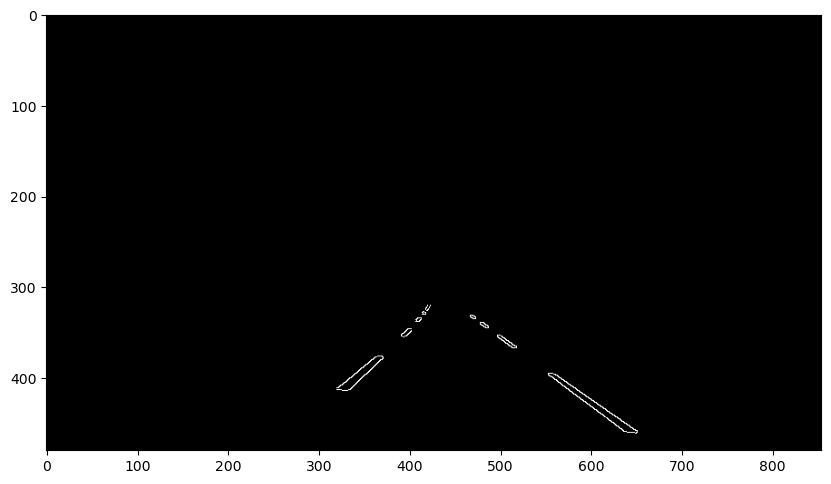

In [8]:
imshape = img.shape
vertices = np.array([[(200, imshape[0]),
                      (420, 320),
                      (480, 320),
                      (700, imshape[0])]], dtype=np.int32)
mask = region_of_interest(edges, vertices)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

#### 이미지에서 사다리꼴 모양의 영역 안에 있는 흰색 차선을 인식하도록 설정하였습니다.
#### region_of_interest() 함수에서는 vertices로 주어진 꼭지점들이 이루는 다각형 모양의 마스크를 만든 후, cv2.bitwise_and() 함수를 사용하여 원본 이미지와 이 마스크를 적용하여 차선 부분만을 추출 하였습니다.

In [9]:
# 함수
def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

# 함수            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_len,
                            maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

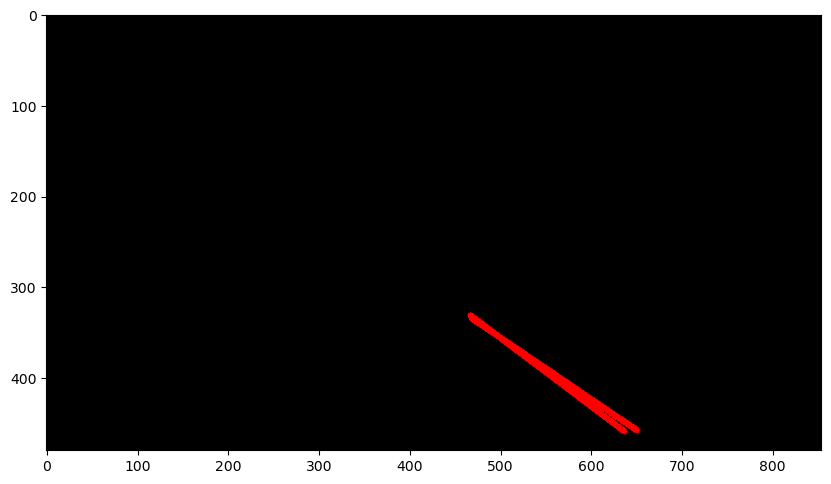

In [10]:
rho = 2
theta = np.pi/180
threshold = 90
min_line_len = 120
max_line_gap = 150

lines = hough_lines(mask, rho, theta, threshold, min_line_len, max_line_gap)

plt.figure(figsize=(10, 8))
plt.imshow(lines, cmap='gray')
plt.show()

#### Hough 변환을 이용하여 이미지에서 직선을 검출하고, 검출된 직선을 그림으로 표현하는 코드입니다.
#### draw_lines 함수는 Hough 변환으로 검출된 직선을 그리기 위한 함수로, cv2.line 함수를 이용하여 이미지 위에 직선을 그립니다.
#### hough_lines 함수는 cv2.HoughLinesP 함수를 이용하여 Hough 변환을 수행한 후, 검출된 직선을 draw_lines 함수를 이용하여 그림으로 표현한 이미지를 반환합니다.
#### 마지막 부분에서는 hough_lines 함수를 이용하여 검출된 직선을 이미지로 출력합니다. plt.imshow 함수를 이용하여 이미지를 출력하고, plt.show 함수를 이용하여 화면에 출력된 이미지를 보여줍니다.

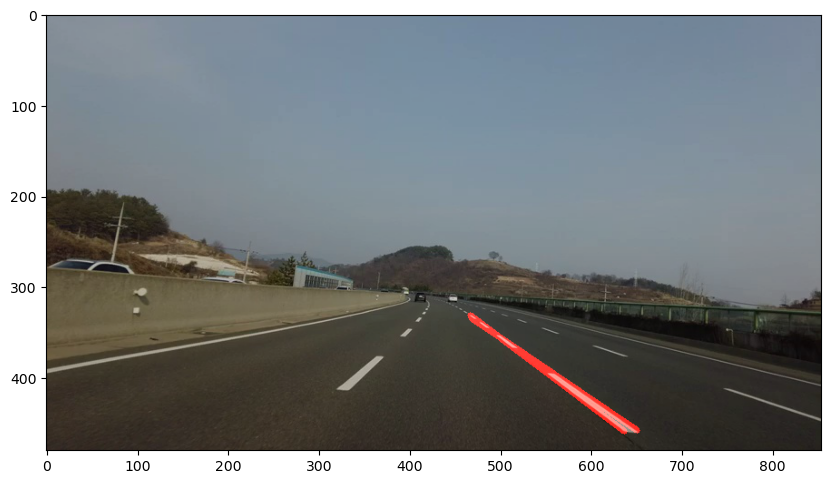

In [11]:
def weighted_img(img, initial_img, a = 0.8, b = 1, c = 0.):
    return cv2.addWeighted(initial_img, a, img, b, c)
 
lines_edges = weighted_img(lines, img, a=0.8, b = 1, c = 0.)

plt.figure(figsize=(10,8))
plt.imshow(lines_edges)
plt.show()

#### weighted_img() 함수는 입력 이미지와 초기 이미지를 가중치를 곱하고 더해서 합칩니다.
#### 이 함수를 사용하여 초기 이미지에 검출된 선을 합친 결과인 lines_edges를 생성합니다.
#### 이미지를 출력하는 plt.imshow() 함수를 사용하여 lines_edges를 출력합니다.

https://pinkwink.kr/1264 사이트를 통해 코드를 보면서 하나하나 연습해보았는데
처음이라서 중간중간 오류가 나왔는데 대부분 오타로 인해서 코드가 안 읽어오는 경우가 많았다.
다음에는 코드를 합쳐보거나 영상을 출력해보려고 합니다.